In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Dataloading
data = pd.read_csv('Mall_Customers.csv')

In [4]:
#FeatureSelection
X = data.iloc[:, [3,4]].values

In [5]:
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

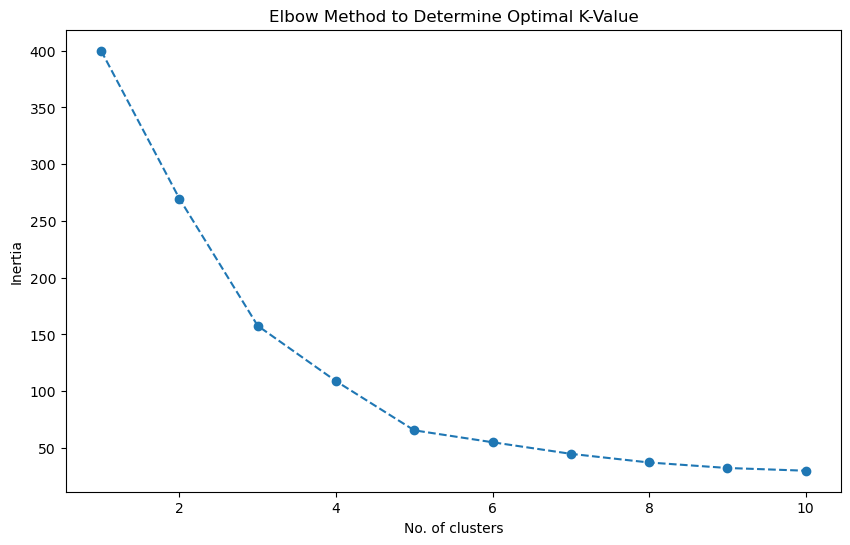

In [6]:
#Elbow method
def elbow_method(X):
    elbow = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        elbow.append(kmeans.inertia_)
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 11), elbow, marker='o', linestyle='--')
    plt.xlabel('No. of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Determine Optimal K-Value')
    plt.show()

elbow_method(X_scaled)

In [7]:
#K-Means Clustering
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

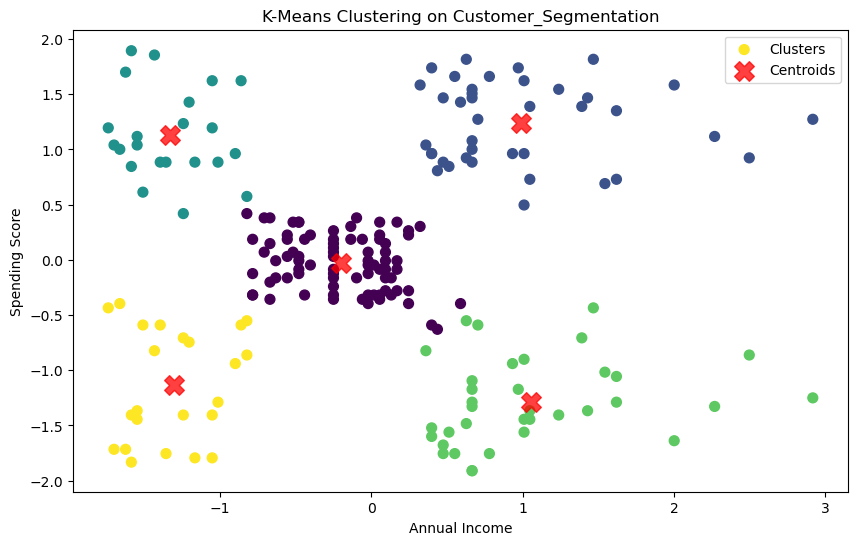

In [8]:
#Plotting K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering on Customer_Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


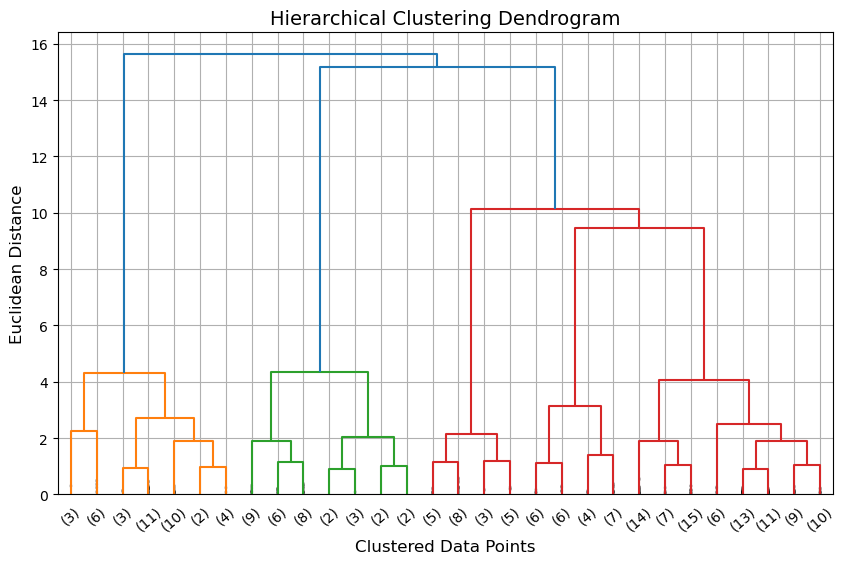

In [9]:
from scipy.cluster.hierarchy import dendrogram  # Ensures correct function
from scipy.cluster.hierarchy import linkage  # Ensures correct function

# Compute hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 6))  
dendro = dendrogram(
    linked, 
    truncate_mode='lastp',  
    p=30,  
    leaf_rotation=41,  
    leaf_font_size=10,  
    show_contracted=True  
)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Clustered Data Points', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.grid(True)  
plt.show()

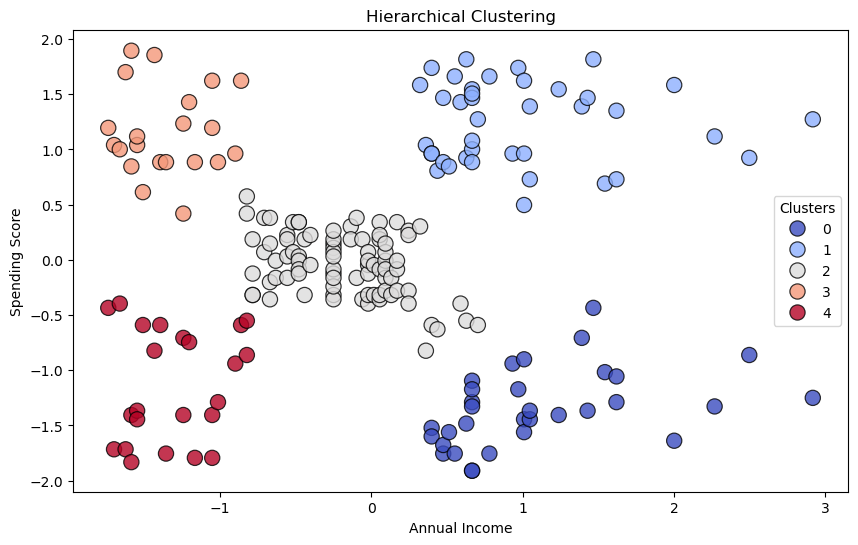

In [10]:
# Choose the number of clusters based on the dendrogram
n_clusters = 5  

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="coolwarm", s=120, alpha=0.8, edgecolors="black", marker="o")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering')
plt.legend(title="Clusters")
plt.show()

In [11]:
#Evaluation(K-Means)
print("K-Means Silhouette Score:",silhouette_score(X_scaled, labels))

K-Means Silhouette Score: 0.5546571631111091


In [12]:
#Evaluation(Hierarchical)
print("Silhouette Score for Hierarchical:", silhouette_score(X_scaled, clusters))

Silhouette Score for Hierarchical: 0.5538089226688662
